In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

In [ ]:
## Homography warping function
def myApplyH(im, H):
    return cv2.warpPerspective(im, H, (im.shape[1], im.shape[0]))

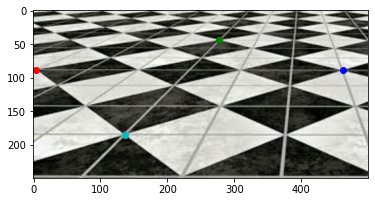

In [ ]:
## Image Read & Point Picking (Square Region)
img = mpimg.imread('./floor.png')

pts = [[4,88], [277, 44], [462,89], [136,185]]

plt.imshow(img)
for i, clr in enumerate(['r', 'g', 'b', 'c']):
  plt.scatter(pts[i][0],pts[i][1],color=clr)

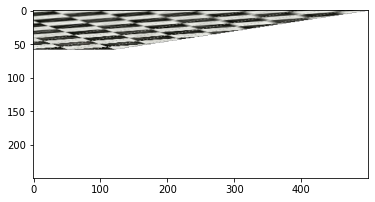

In [ ]:
## Image Rectification (USE ONLY NUMPY LIBRARY)
H_rec = np.identity(3)

homo_pts1 = np.array(pts[0] + [1])
homo_pts2 = np.array(pts[1] + [1])
homo_pts3 = np.array(pts[2] + [1])
homo_pts4 = np.array(pts[3] + [1])

v11 = np.cross(homo_pts1, homo_pts2)
v12 = np.cross(homo_pts3, homo_pts4)

v21 = np.cross(homo_pts1, homo_pts4)
v22 = np.cross(homo_pts2, homo_pts3)

infin_pt1 = np.cross(v11, v12)
infin_pt2 = np.cross(v21, v22)
infin_pt1 = infin_pt1 / infin_pt1[2]
infin_pt2 = infin_pt2 / infin_pt2[2]

infin_v = np.cross(infin_pt1, infin_pt2)

H_rec[2,0] = infin_v[0] / infin_v[2]
H_rec[2,1] = infin_v[1] / infin_v[2]

rectified_img = myApplyH(img, H_rec)
plt.imshow(rectified_img)

[[1.00062429 0.         0.        ]
 [0.18279782 5.33219173 0.        ]
 [0.         0.         1.        ]]


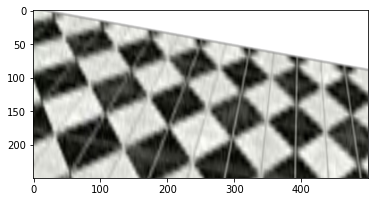

In [ ]:
## Image Affine (Only Orthogonal) (USE ONLY NUMPY LIBRARY. hint: np.linalg.svd, np.linalg.cholesky, np.linalg.inv are necessary.)
H_aff = np.identity(3)

homo_pts1 = np.array(pts[0] + [1])
homo_pts2 = np.array(pts[1] + [1])
homo_pts3 = np.array(pts[2] + [1])
homo_pts4 = np.array(pts[3] + [1])

v11 = np.cross(homo_pts1, homo_pts2)
v12 = np.cross(homo_pts2, homo_pts3)

v21 = np.cross(homo_pts1, homo_pts3)
v22 = np.cross(homo_pts2, homo_pts4)

A = np.zeros((2, 3))
A[0,0] = v11[0]*v12[0]
A[0,1] = v11[0]*v12[1] + v11[1]*v12[0]
A[0,2] = v11[1]*v12[1]
A[1,0] = v21[0]*v22[0]
A[1,1] = v21[0]*v22[1] + v21[1]*v22[0]
A[1,2] = v21[1]*v22[1]

U, D, Vh = np.linalg.svd(A)
x = Vh[-1, :]
KKt = np.zeros((2,2))
KKt[0,0] = x[0]
KKt[0,1] = x[1]
KKt[1,0] = x[1]
KKt[1,1] = x[2]

K = np.linalg.cholesky(KKt)
H_aff[0,0] = K[0,0]
H_aff[0,1] = K[0,1]
H_aff[1,0] = K[1,0]
H_aff[1,1] = K[1,1]
H_aff = np.linalg.inv(H_aff)

print(H_aff)

affine_img = myApplyH(img, H_aff)
plt.imshow(affine_img)

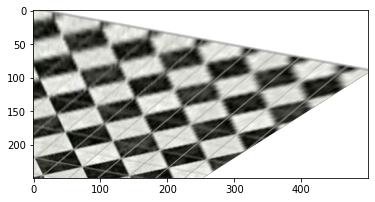

In [ ]:
## Image Affine (Both of Rectification & Orthogonal) (Hint. We can solve this within just one line by using the above results)
H_dual = np.identity(3)

H_dual = np.matmul(H_aff, np.matmul(H_rec, H_dual))

final_img = myApplyH(img, H_dual)
plt.imshow(final_img)